___
# Ciência dos Dados - PROJETO 1

##Lúcia Coelho Richardson

##Projeto 1

___
## Introdução
Descreva aqui o que pretende analisar!
Como as diferentes faixas salariais influenciam na escolha entre a internet banda larga ou 3G,4G.
Como o salario influencia na conectividade em cada regiao?

___
## Análise e Resultados

In [128]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
matplotlib.style.use('ggplot')

In [129]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\User\Music\Ciencia-dos-Dados-2017.2\CD17\Projeto1


In [130]:
#Se usar o arquivo descompactado
dados = pd.read_csv('DOM2015.csv',sep=',')
(#conexao apenas 3g4g é mais escolhida em faixas de salario menor se comparado a banda larga, que é muito alta e relevante
#as faixas salariais mais elevadas)

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [131]:
#escolhendo as variaveis na base de dados e retirada dos nulos
escolha_var = dados.loc[:,["UF","V02324","V4622", "V02424", "V02425", "V02426"]]

dados_nao_nulos = escolha_var[pd.notnull(escolha_var.V02324)]

dados = dados_nao_nulos

In [132]:
dados.columns

Index(['UF', 'V02324', 'V4622', 'V02424', 'V02425', 'V02426'], dtype='object')

In [133]:

###nivel de coneccao por estado

In [134]:
#divisao em estados para melhor organizacao
dados.UF = dados.UF.astype("int")
dados.loc[dados.UF >=50, "Regiao"] = "Centro-Oeste"
dados.loc[(dados.UF >= 41) & (dados.UF <= 43), "Regiao"] = "Sul"
dados.loc[(dados.UF >= 31) & (dados.UF <= 35), "Regiao"] = "Sudeste"
dados.loc[(dados.UF >= 11) & (dados.UF <= 17), "Regiao"] = "Norte"
dados.loc[(dados.UF >= 21) & (dados.UF <= 29), "Regiao"] = "Nordeste"

C:\ProgramData\Anaconda\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\ProgramData\Anaconda\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [135]:
#separacao do nivel de conecividade baseado em 3 criterios (juntos e separados)
dados.loc[dados.V02425 == 2, "Conectividade"] = "1" #só discada
dados.loc[dados.V02426 == 2, "Conectividade"] = "2" #só banda larga
dados.loc[dados.V02424 == 2, "Conectividade"] = "3" # só 3g4g
dados.loc[(dados.V02425 == 2)&(dados.V02426 == 2), "Conectividade"] = 4 #banda larga e discada
dados.loc[(dados.V02425 == 2)&(dados.V02424 == 2), "Conectividade"] = 5 #discada e 3g4g
dados.loc[(dados.V02426 == 2)&(dados.V02424 == 2), "Conectividade"] = 6 #3g4g banda larga
dados.loc[(dados.V02426 == 2)&(dados.V02425 == 2)& (dados.V02424 == 2), "Conectividade"] = 7 #todas

C:\ProgramData\Anaconda\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [136]:
#renomeando as categorias para facilitar na analise dos dados
#renomeando as "linhas"
dados.V02324 = dados.V02324.astype('category')
dados.V02324.cat.categories=["Sim", "Não"]
dados.V02424 = dados.V02424.astype('category')
dados.V02424.cat.categories=["Sim", "Não"]
dados.V02425 = dados.V02425.astype('category')
dados.V02425.cat.categories=["Sim", "Não"]
dados.V02426 = dados.V02426.astype('category')
dados.V02426.cat.categories=["Sim", "Não"]
dados.V4622 = dados.V4622.astype('category')
dados.V4622.cat.categories=["sem rendimento","1/4 do salario minimo", "entre 1/2 e 1/4 do salario minimo", "mais de 1/2 salario minimo", "entre 1 e 2 salarios minimos", "entre 2 e 3 salarios minimos", "entre 3 e 5 salarios minimos", "mais de 5 salarios minimos", "sem declaracao"]


C:\ProgramData\Anaconda\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [137]:
#renomei as colunas principais 
renomear = dados.rename(columns = {"V02324": "Acesso a internet via celular", "V4622":"Salario", "V02424":"Internet via 3G e 4G", "V02425":"Internet via conexao discada", "V02426":"Internet via banda larga"})
renomear

,UF,Acesso a internet via celular,Salario,Internet via 3G e 4G,Internet via conexao discada,Internet via banda larga,Regiao,Conectividade
2,11,Não,entre 1 e 2 salarios minimos,Sim,Não,Sim,Norte,6
3,11,Sim,entre 1 e 2 salarios minimos,Sim,Não,Sim,Norte,6
5,11,Não,entre 2 e 3 salarios minimos,Não,Não,Sim,Norte,2
8,11,Sim,entre 1 e 2 salarios minimos,Sim,Não,Sim,Norte,6
10,11,Sim,entre 2 e 3 salarios minimos,Sim,Não,Sim,Norte,6
11,11,Sim,entre 3 e 5 salarios minimos,Sim,Não,Sim,Norte,6
13,11,Sim,entre 1 e 2 salarios minimos,Sim,Não,Sim,Norte,6
15,11,Sim,mais de 1/2 salario minimo,Sim,Não,Sim,Norte,6
17,11,Sim,mais de 1/2 salario minimo,Não,Não,Sim,Norte,2
18,11,Sim,entre 1 e 2 salarios minimos,Não,Não,Sim,Norte,2


In [138]:
cruzamento_2 = pd.crosstab(dados["Regiao"], dados["Conectividade"], normalize="index") 
    
cruzamento_2*100


Conectividade,4,5,6,7,1,2,3
Regiao,,,,,,,
Centro-Oeste,0.632340,1.471158,45.528455,0.916247,0.193573,25.512969,25.745257
Nordeste,0.760409,1.259038,35.128397,0.274246,0.230616,30.971080,31.376215
Norte,0.599925,2.099738,28.346457,0.362455,0.312461,16.797900,51.481065
Sudeste,0.556727,1.543652,46.571067,1.193589,0.371151,26.014340,23.749473
Sul,0.616383,1.143552,38.459043,0.308191,0.494728,37.656123,21.321979


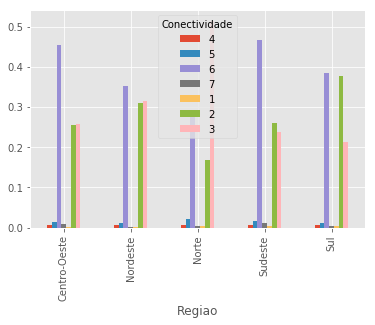

In [139]:
#grafico qualitativo/quant que indica a conectividade conforme o estado

cruzamento_2.plot(kind="bar") #baseado nos niveis de conectividade criados por mim

In [140]:
#renomear.columns
#renomear.describe()

In [141]:
#salario x regiao
cruzamento_1 = pd.crosstab( renomear["Salario"], renomear["Regiao"],normalize="index") 
    
cruzamento_1*100

#cruzamento_1.plot(kind="bar", figsize = (20,10))

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Salario,,,,,
sem rendimento,20.543807,9.365559,5.438066,46.223565,18.429003
1/4 do salario minimo,5.340224,50.645995,18.992248,18.776916,6.244617
entre 1/2 e 1/4 do salario minimo,8.111853,39.387832,18.692531,25.771508,8.036277
mais de 1/2 salario minimo,10.118148,29.178565,13.690576,32.566213,14.446498
entre 1 e 2 salarios minimos,12.153389,18.464093,10.241055,37.602536,21.538926
entre 2 e 3 salarios minimos,13.087622,14.742698,9.165508,38.358832,24.645341
entre 3 e 5 salarios minimos,13.670614,15.984930,8.449946,37.818443,24.076067
mais de 5 salarios minimos,16.641250,13.438811,6.404880,40.983607,22.531453
sem declaracao,7.656458,11.584554,7.456724,51.331558,21.970706


In [142]:
#Como é possivel notar os telefones celulares sao uma prioridade mesmo as pessoas com uma faixa salarial mais reduzida

In [143]:
#cruzamento da faixa salarial com o nivel de conectividade
cruzamento = pd.crosstab(renomear["Salario"], renomear["Conectividade"], normalize="index") 
    
cruzamento*100
#da para perceber com a tabela que a partir de quando a pessoa ganha mais que 0.5 salario minimo 
#seu investimento com a conectividade aumenta e passa de separadamente sair de apenas 1 tipo de conectividade para mais que um 
#o que mais se destaca é o de banda larga e 3g4g (custo mais alto) que cresce cerca de 10"pontos" a mais que comparado 
#a faixa salarial anterior, porem a opcao por apenas 1 apesar de decrescer bastante ainda é bem alta 
#ja quando a populacao tem acesso a mais de 1(ate 2)salarios e entre 2 e 3 é notavel grandes saltos de "conectividade" porem a 
#opcao apenas pela banda larga continua sendo "viavel" pelo que demonstra os dados

Conectividade,4,5,6,7,1,2,3
Salario,,,,,,,
sem rendimento,0.604230,1.812689,41.087613,2.416918,0.604230,23.262840,30.211480
1/4 do salario minimo,0.301464,1.335056,17.614126,0.258398,0.430663,22.782084,57.278208
entre 1/2 e 1/4 do salario minimo,0.541630,1.108452,23.227107,0.314901,0.314901,25.028341,49.464668
mais de 1/2 salario minimo,0.615936,1.674226,32.711798,0.464752,0.341564,27.319559,36.872165
entre 1 e 2 salarios minimos,0.714609,1.529868,41.714056,0.825323,0.347240,29.802224,25.066680
entre 2 e 3 salarios minimos,0.751043,1.752434,49.791377,0.931850,0.375522,30.514604,15.883171
entre 3 e 5 salarios minimos,0.663796,1.255831,55.077144,1.004665,0.340868,30.265518,11.392178
mais de 5 salarios minimos,0.514678,0.895921,63.248189,0.781548,0.190621,25.600457,8.768586
sem declaracao,0.332889,1.331558,48.468708,0.998668,0.199734,32.157124,16.511318


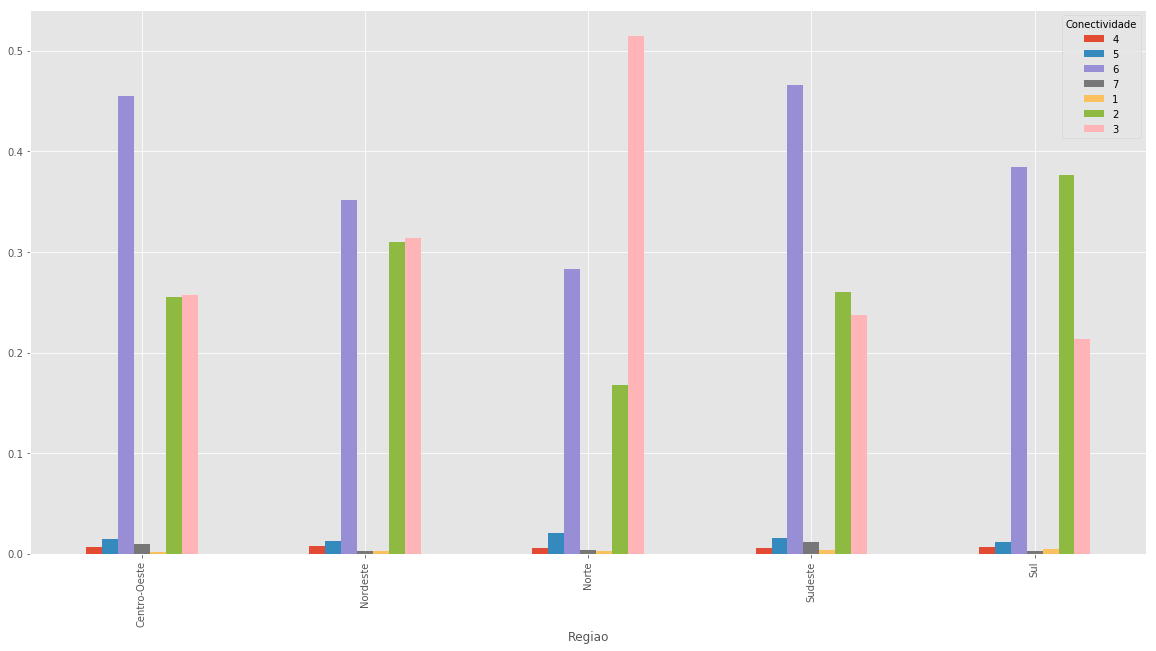

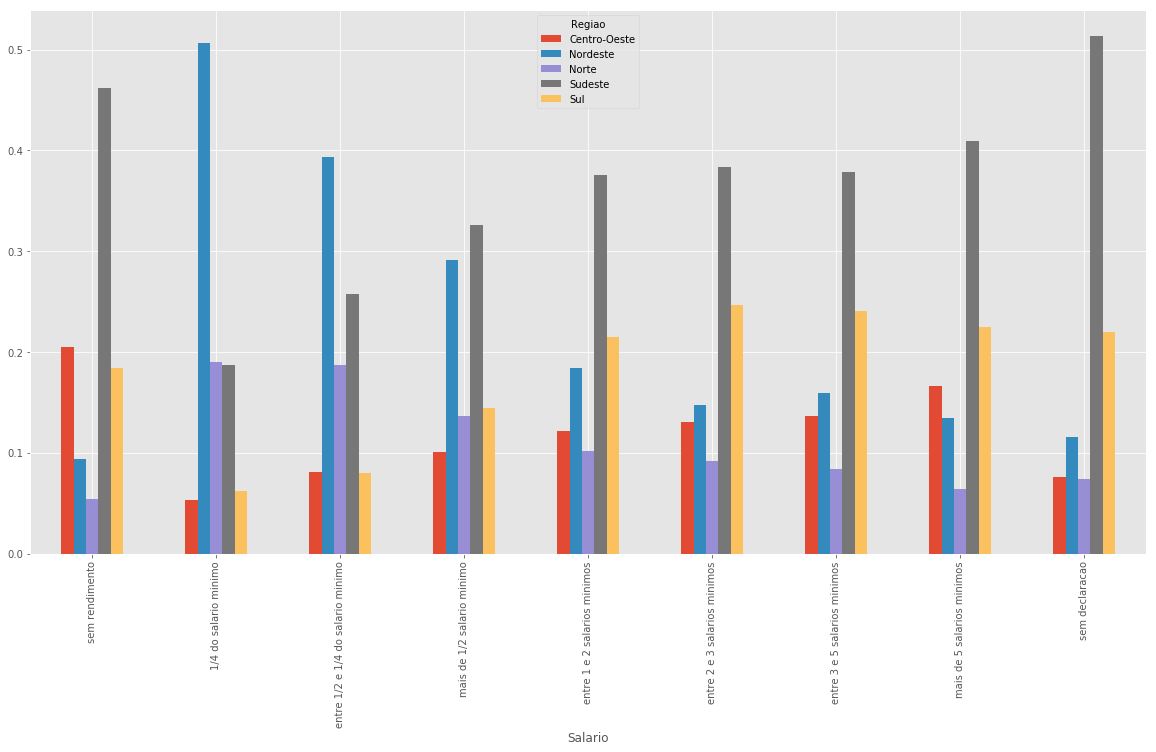

In [144]:
###############################################################IMPORT######################
cruzamento_2.plot(kind="bar", figsize = (20,10))
cruzamento_1.plot(kind="bar",figsize = (20,10))

#graf que engloba variaveis quant e quali - e determina a porcentagem de pessoas conectadas
#conforme seu salario e "nivel de conectividade 

In [145]:

#cruzamento.plot(kind="bar", figsize = (20,10))

In [146]:
#cruzamento da faixa salarial com relacao a Internet via banda larga, o que demonstra que quanto maior poder aquisitivo 
#maior o acesso a banda larga 
cruzamento_3 = pd.crosstab(renomear["Salario"], renomear["Internet via banda larga"], normalize="index") 

cruzamento_3 * 100


Internet via banda larga,Sim,Não
Salario,,
sem rendimento,67.371601,32.628399
1/4 do salario minimo,40.956072,59.043928
entre 1/2 e 1/4 do salario minimo,49.111979,50.888021
mais de 1/2 salario minimo,61.112044,38.887956
entre 1 e 2 salarios minimos,73.056213,26.943787
entre 2 e 3 salarios minimos,81.988873,18.011127
entre 3 e 5 salarios minimos,87.011123,12.988877
mais de 5 salarios minimos,90.144872,9.855128
sem declaracao,81.957390,18.042610


In [147]:
#x = cruzamento_3 * 100
#x.describe()

#cruzamento_3.plot(kind='pie', colors=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'),subplots = True, figsize = (5,10),layout=(2,1), autopct="%0.2f",legend=False)


In [157]:
#plot = cruzamento_3.T.plot(kind='bar',color=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'), stacked=True,title='Banda Larga x salario')
#Para legenda ficar fora do gráfico
#ax = plt.subplot(111)
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
cruzamento_4 = pd.crosstab(renomear["Salario"], renomear["Internet via 3G e 4G"], normalize="index")
cruzamento_4 * 100
#cruzamento_4
#a


Internet via 3G e 4G,Sim,Não
Salario,,
sem rendimento,75.528701,24.471299
1/4 do salario minimo,76.485788,23.514212
entre 1/2 e 1/4 do salario minimo,74.115128,25.884872
mais de 1/2 salario minimo,71.722941,28.277059
entre 1 e 2 salarios minimos,69.135927,30.864073
entre 2 e 3 salarios minimos,68.358832,31.641168
entre 3 e 5 salarios minimos,68.729817,31.270183
mais de 5 salarios minimos,73.694243,26.305757
sem declaracao,67.310253,32.689747


In [149]:
#comparando ambos --- 
#conexao apenas 3g4g é mais escolhida em faixas de salario menor se comparado a banda larga, que é muito alta e relevante
#as faixas salariais mais elevadas, 

#cruzamento_4.plot(kind='pie', colors=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'),subplots = True, figsize = (5,10),layout=(2,1), autopct="%0.2f",legend=False)


[]

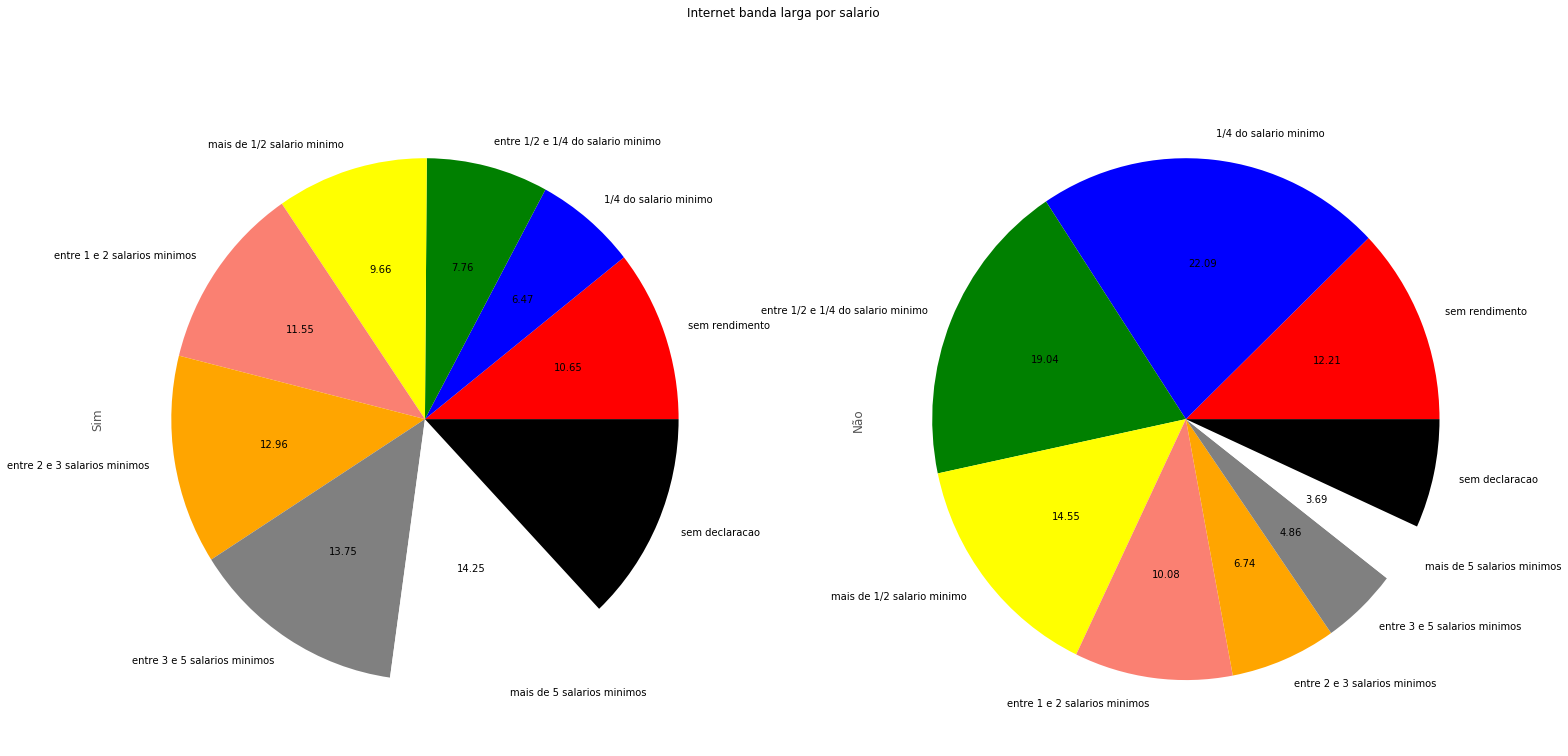

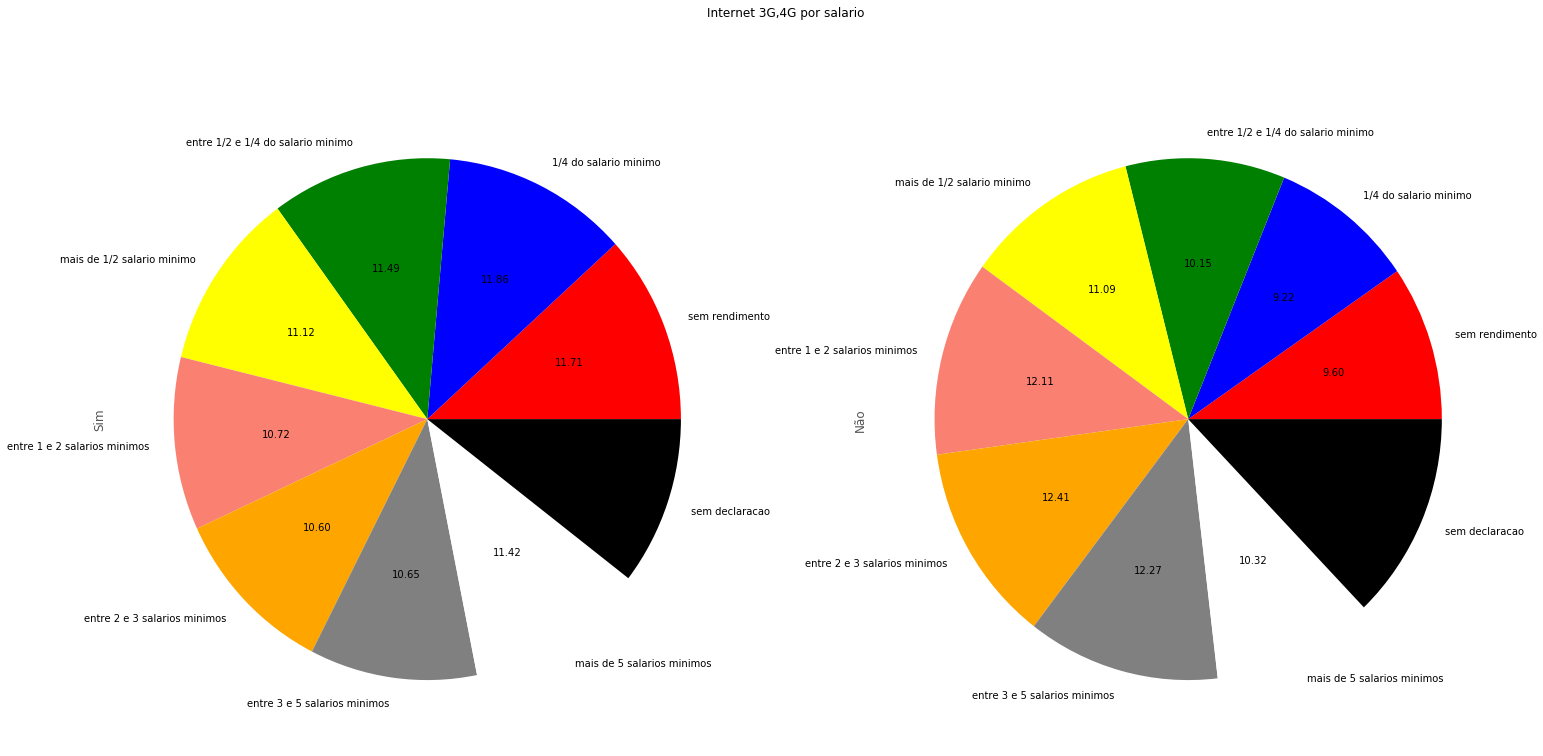

In [150]:

cruzamento_3.plot(kind='pie', colors=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'),subplots = True, figsize = (25,12),layout=(1,2), autopct="%0.2f",legend=False, title = "Internet banda larga por salario")
plt.plot()
cruzamento_4.plot(kind='pie', colors=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'),subplots = True, figsize = (25,12),layout=(1,2), autopct="%0.2f",legend=False, title = "Internet 3G,4G por salario")
plt.plot()



In [151]:
#y= cruzamento_4 * 100
#y.describe()


In [152]:
#plot = cruzamento_4.T.plot(kind='bar',color=('red','blue','green','yellow', 'salmon', 'orange', 'grey', 'white', 'black'), stacked=True,title='Internet 3g4g x salario')
#Para legenda ficar fora do gráfico
#ax = plt.subplot(111)
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [153]:
#f, axarr = plt.subplots(2,figsize=(9,12))
#axarr[0].hist(cruzamento_3, bins=9)
#axarr[0].set_title('Banda Larga x Salario')
#axarr[0].set_xlabel('')
#axarr[0].set_ylabel('')

#axarr[1].hist(cruzamento_3, bins=9)
#axarr[1].set_title('3g4g x Salario')
#axarr[1].set_xlabel('')
#axarr[1].set_ylabel('')

#    axarr[2].hist(dados.RENDA, bins=15, normed=1, alpha=0.5)
#   axarr[2].set_title('Histograma')
#   axarr[2].set_xlabel('Renda')
#   axarr[2].set_ylabel('Densidade')

#plt.tight_layout(1)

In [154]:
dados["Conectividade"].value_counts()

6    27216
3    19408
2    19101
5      991
7      465
4      427
1      226
Name: Conectividade, dtype: int64

In [155]:
renomear.to_csv("Resumo.csv")                        #criando o arq no excel

In [156]:
#dados.V4622.describe()
#dados.V4622.quantile

___
## Conclusão 

Descreva aqui suas conclusões!